In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,Head,10,1000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  12 non-null     object
 1   Level     12 non-null     int64 
 2   Salary    12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

<AxesSubplot:xlabel='Level', ylabel='Salary'>

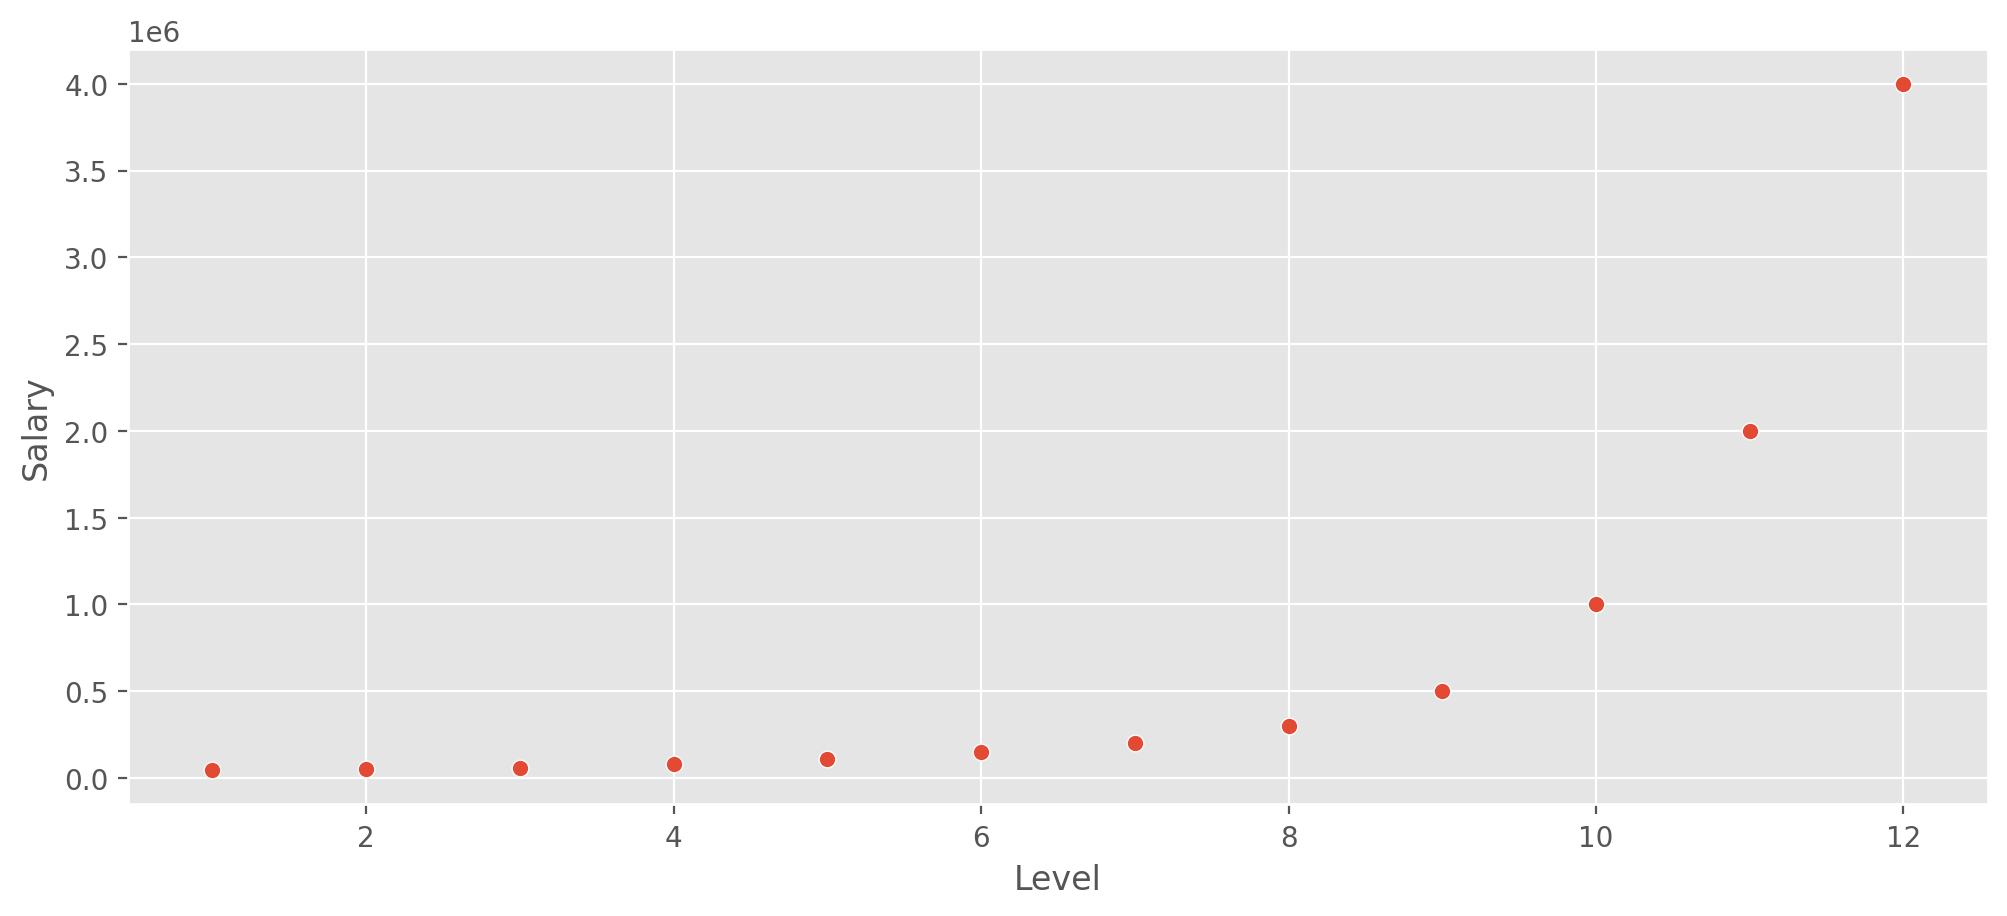

In [6]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('Level', 'Salary', data = df)

In [7]:
X = df[['Level']].values
Y = df[['Salary']].values

### First let us try Simple Linear Regression
- **Y' = B0 + B1*X**

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [9]:
lin_reg.score(X,Y)

0.5613579410973761

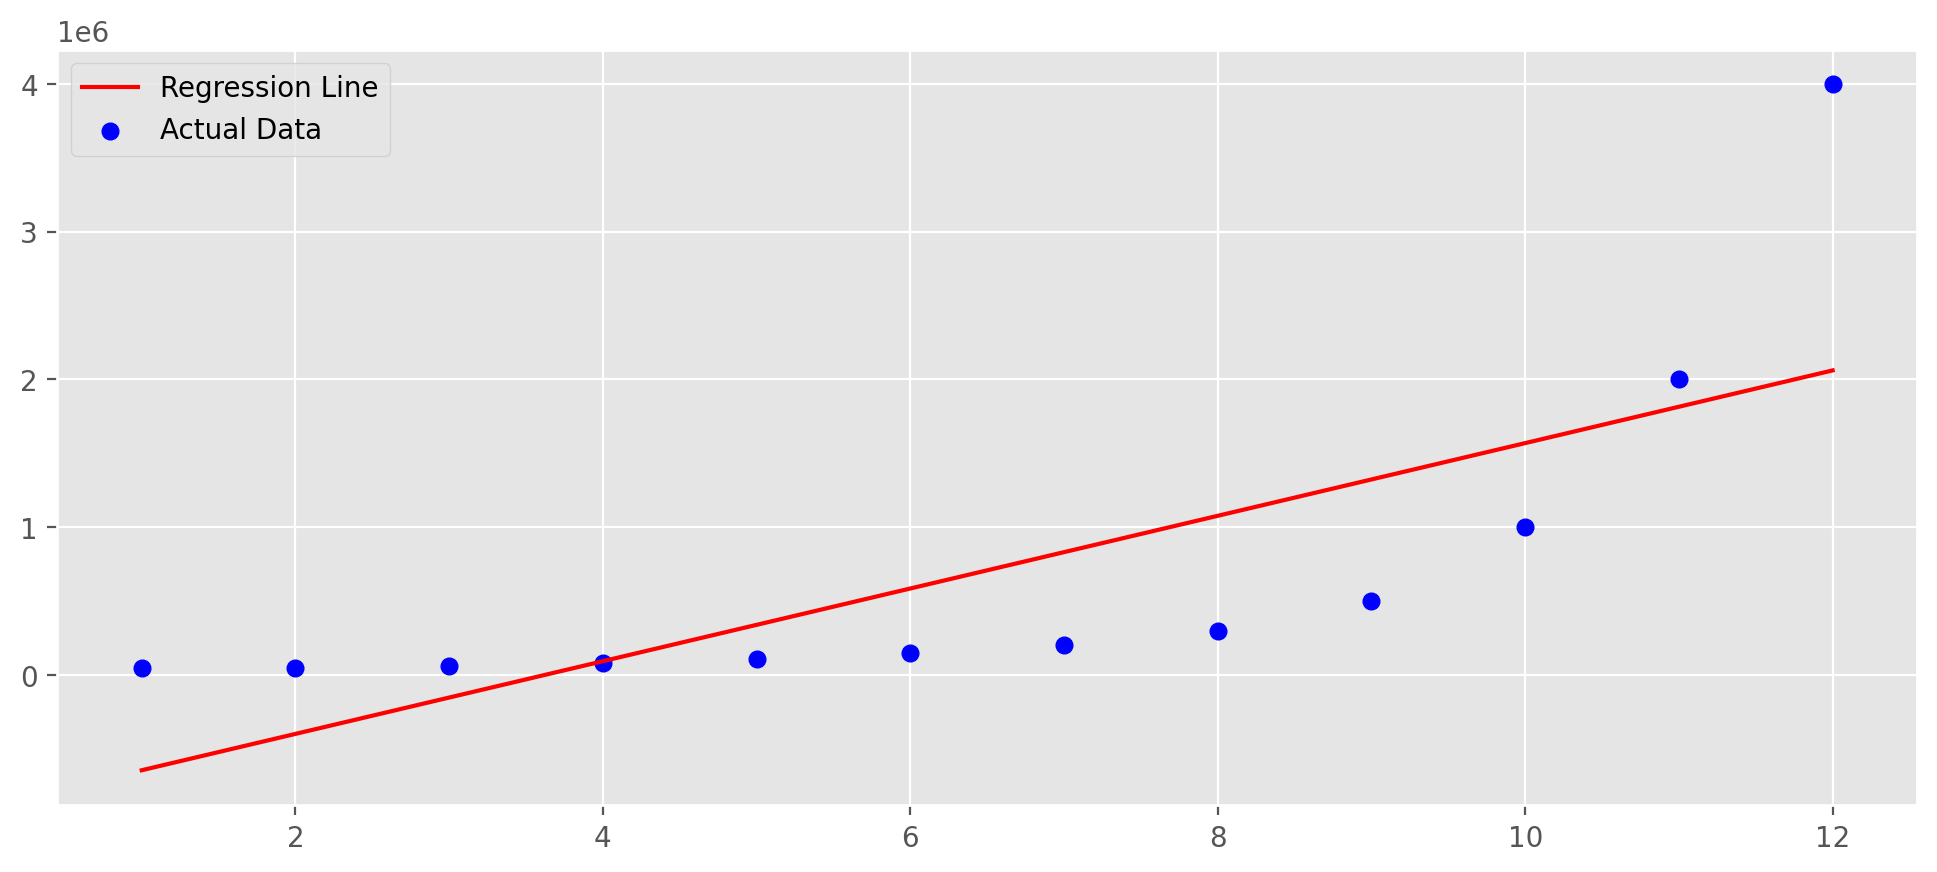

In [10]:
pred1 = lin_reg.predict(X)

plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(X,Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred1, c = 'r', label = 'Regression Line')
plt.legend()

## Using Polymomial Regression
- Linear function is not capable of capturing non linear patterns/relationships
- To capture non linear relationships we need to add higher degree variables

In [14]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]], dtype=int64)

In [15]:
# Sklearn PolynomialFeatures can be used to create higher degree variables

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly2 = poly.fit_transform(X)

X_poly2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.]])

- Y' = B0 + B1 * X + B2 * X**2
- **Y' = B0 + B1 * X1 + B2 * X2**

In [16]:
poly_reg2 = LinearRegression()
poly_reg2.fit(X_poly2, Y)

poly_reg2.score(X_poly2, Y)

0.8744625771933063

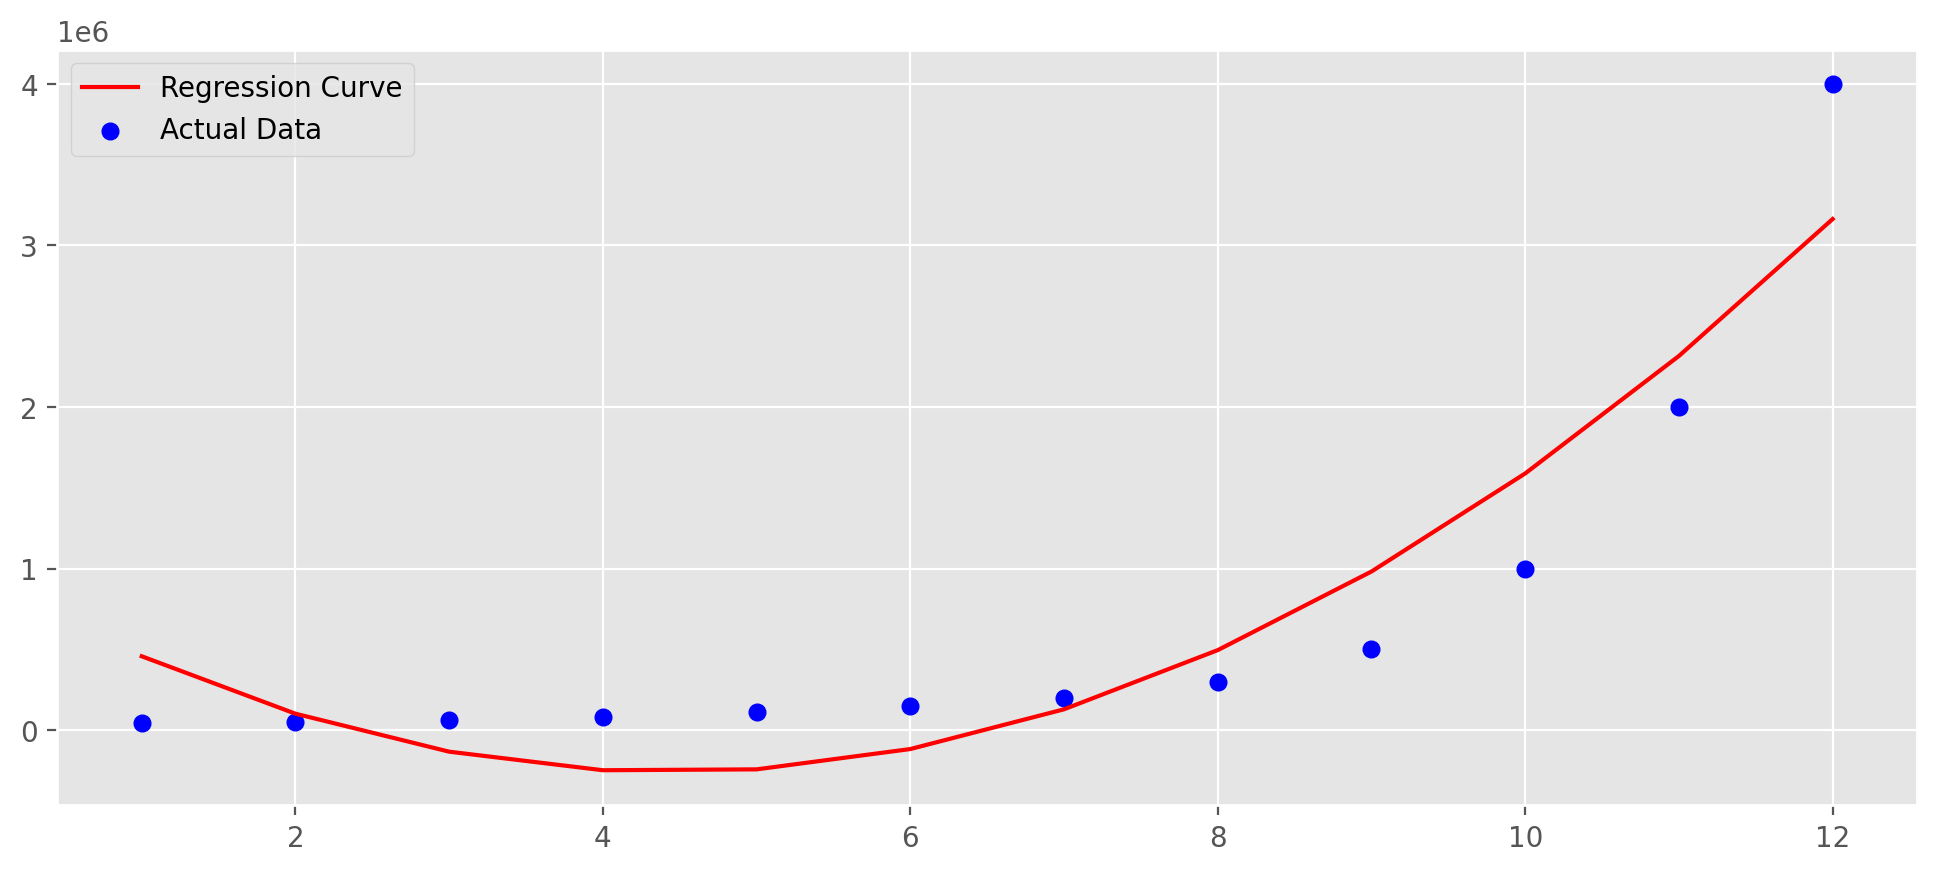

In [17]:
pred2 = poly_reg2.predict(X_poly2)

plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(X,Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred2, c = 'r', label = 'Regression Curve')
plt.legend()

### With degree 3

In [18]:
poly = PolynomialFeatures(degree = 3)
X_poly3 = poly.fit_transform(X)

X_poly3

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03]])

In [20]:
poly_reg3 = LinearRegression()
poly_reg3.fit(X_poly3, Y)

poly_reg3.score(X_poly3,Y)

0.977588678976728

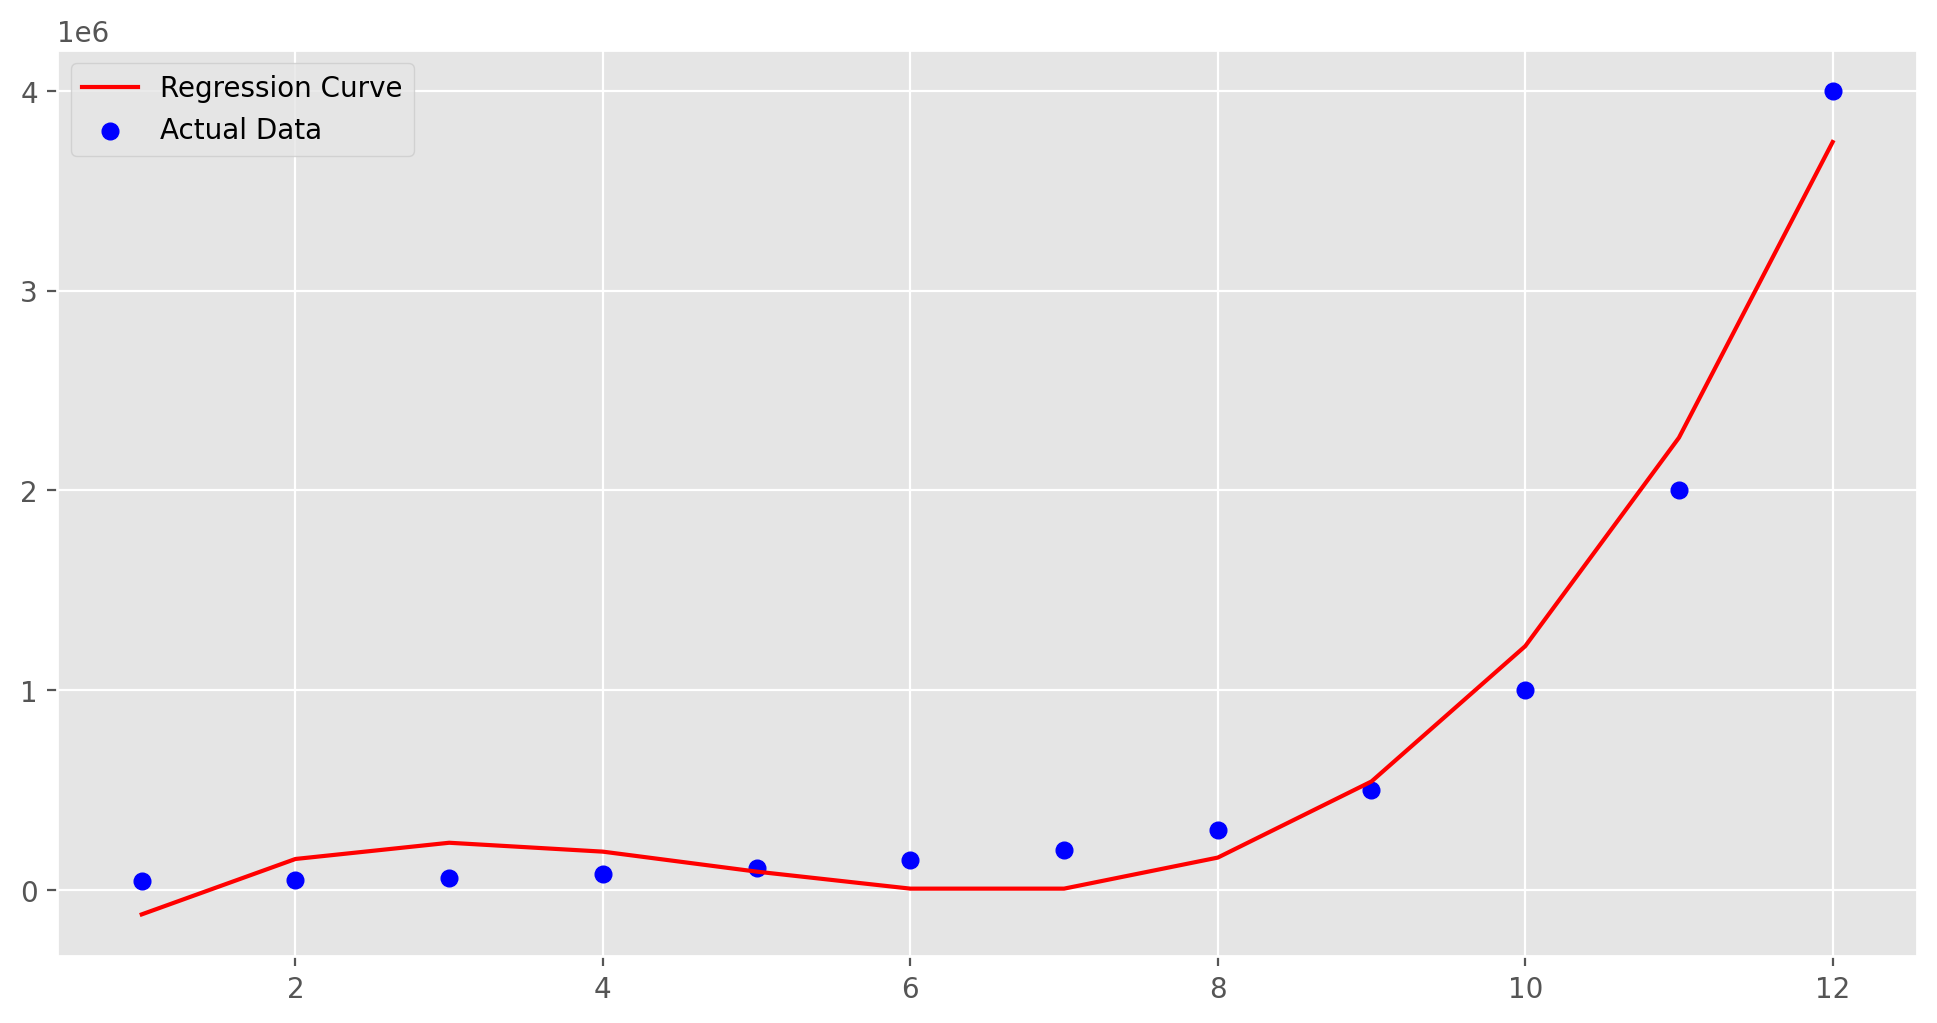

In [21]:
pred3 = poly_reg3.predict(X_poly3)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X,Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred3, c = 'r', label = 'Regression Curve')
plt.legend()

### With degree 6

In [22]:
poly = PolynomialFeatures(degree = 6)
X_poly6 = poly.fit_transform(X)

poly_reg6 = LinearRegression()
poly_reg6.fit(X_poly6, Y)

poly_reg6.score(X_poly6, Y)

0.9999829337129567

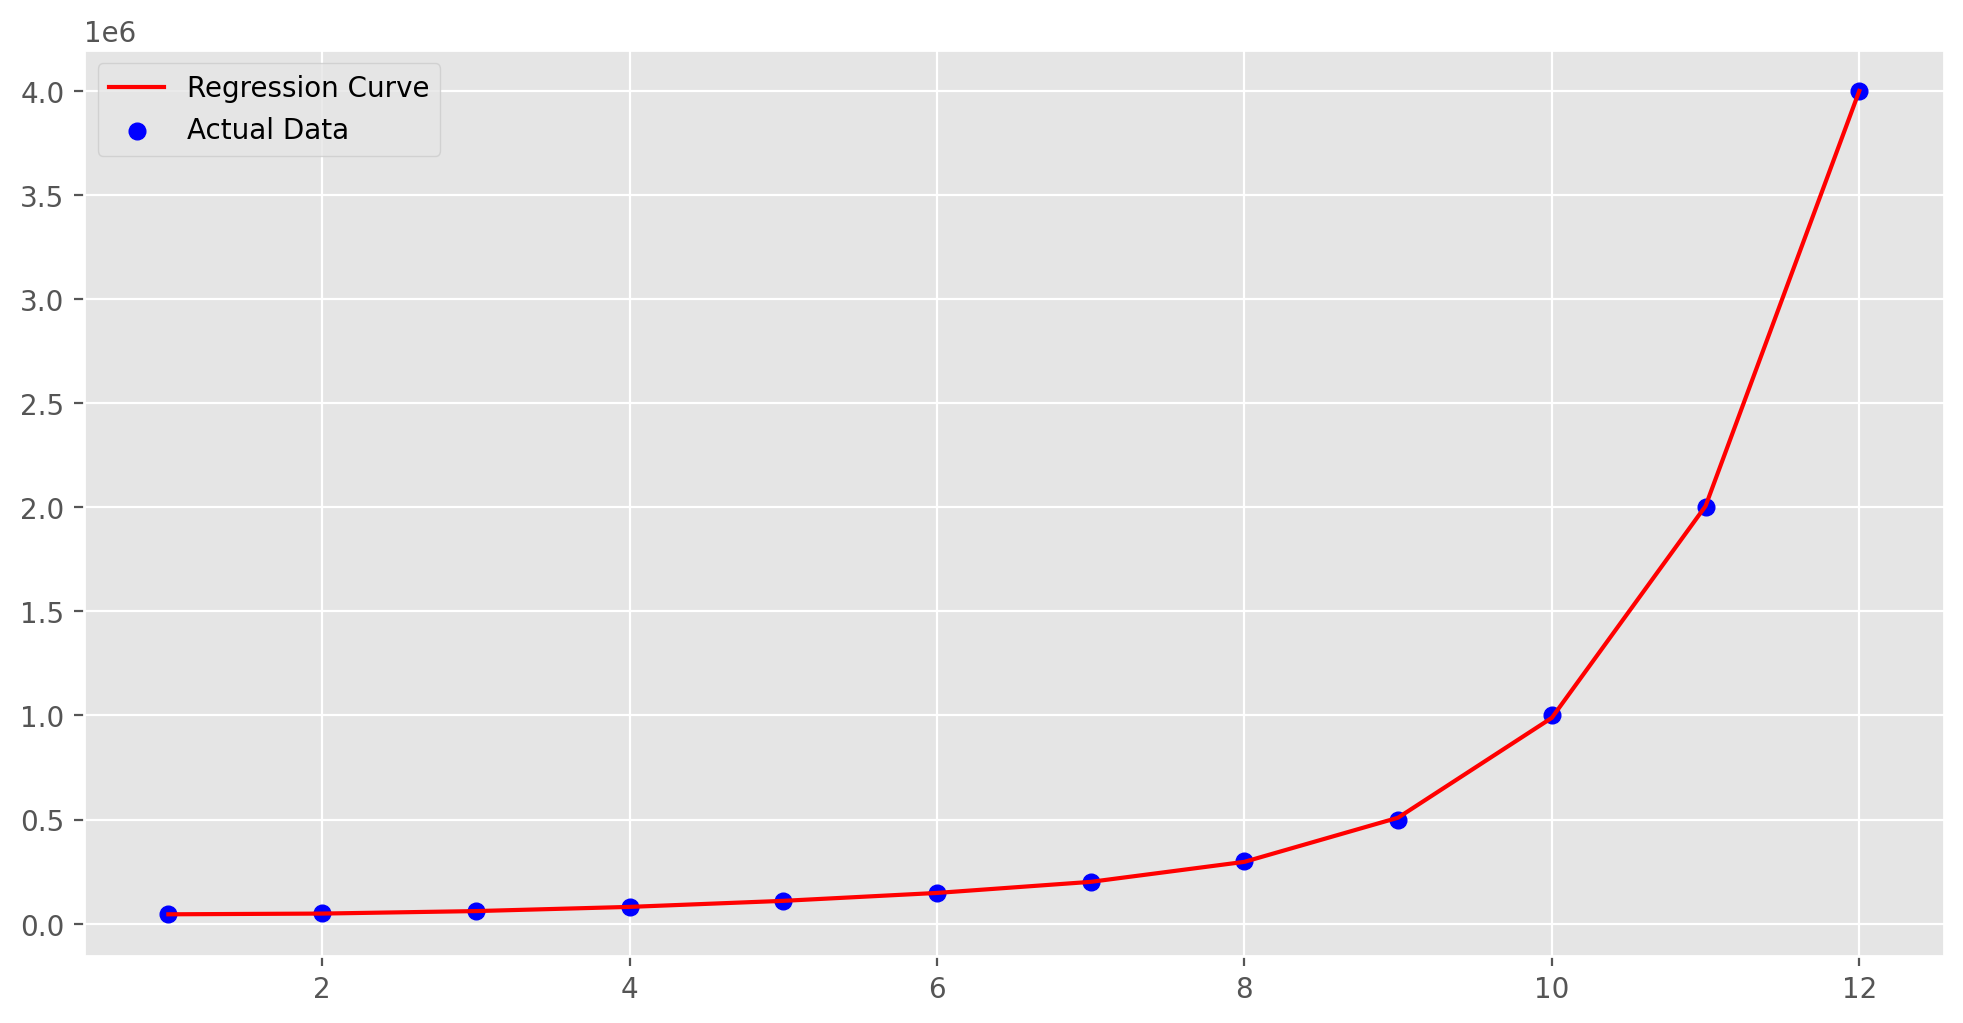

In [23]:
pred6 = poly_reg6.predict(X_poly6)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X,Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred6, c = 'r', label = 'Regression Curve')
plt.legend()

# Comparing results

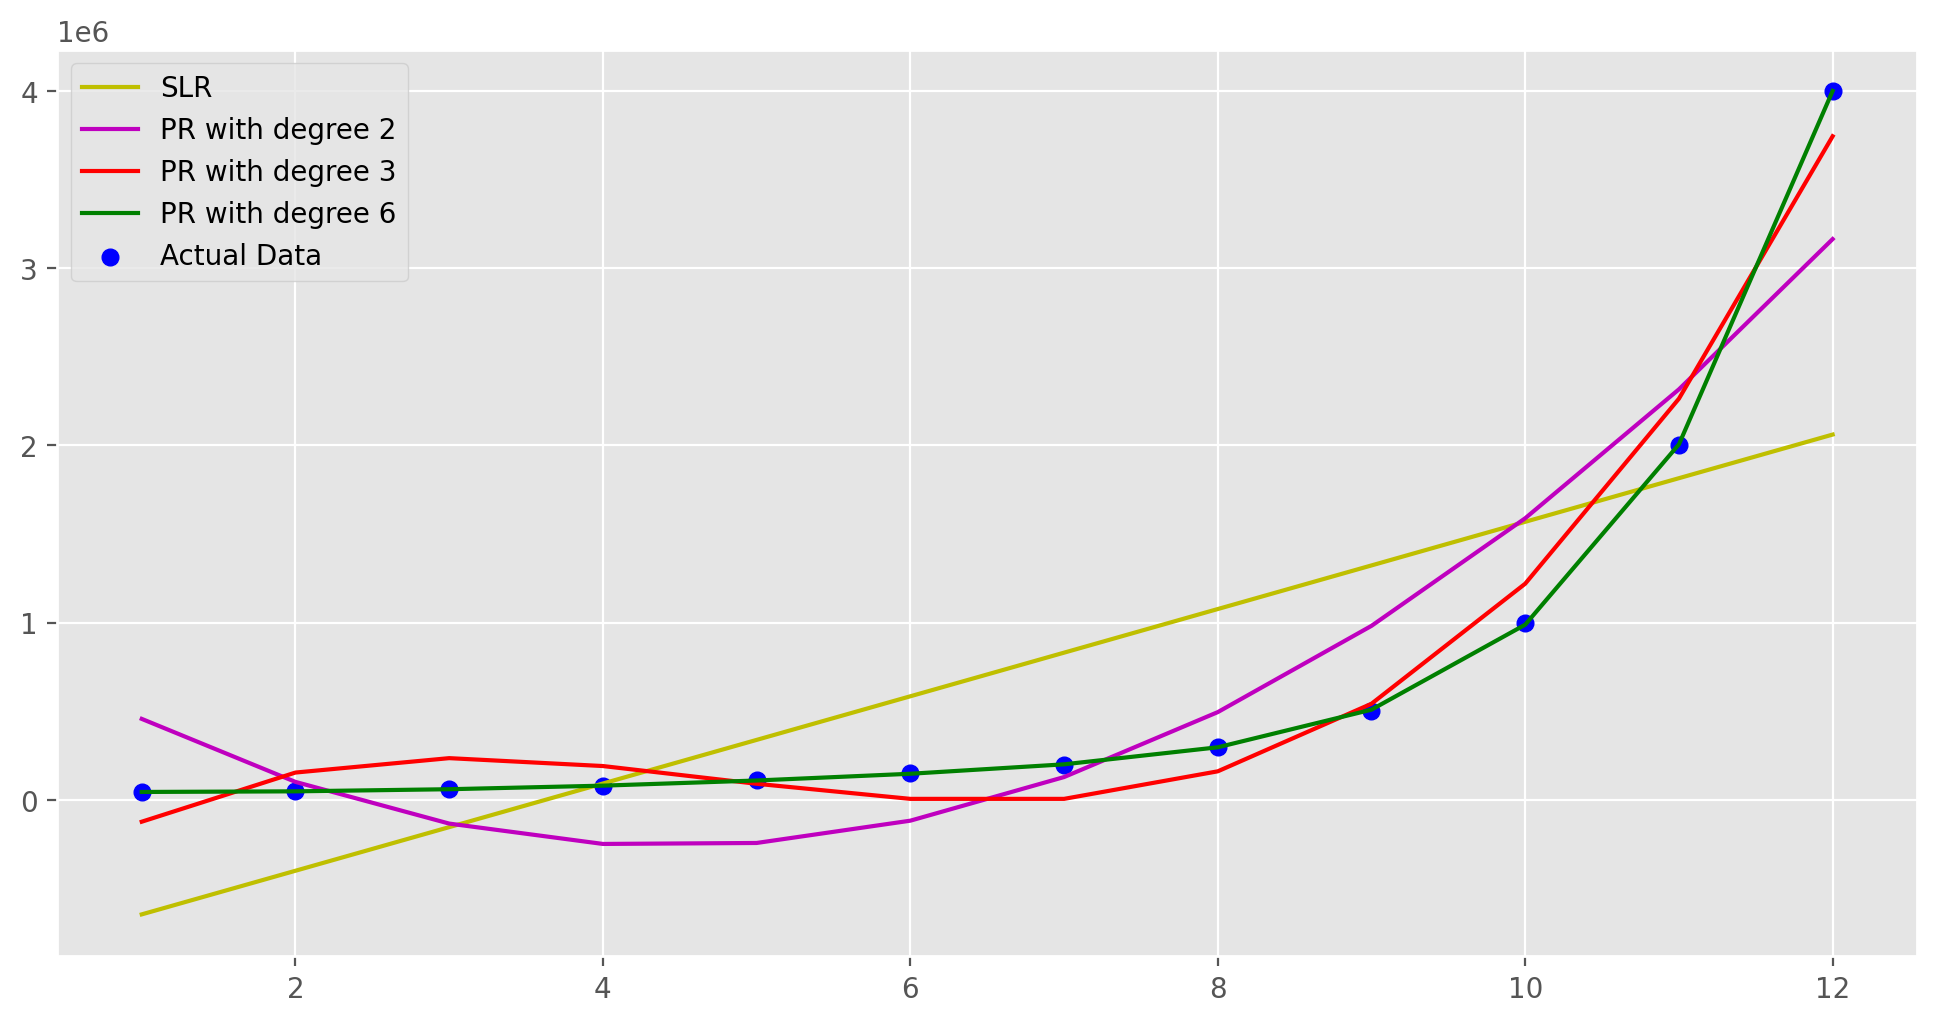

In [24]:
plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred1, c = 'y', label = 'SLR')
plt.plot(X, pred2, c = 'm', label = 'PR with degree 2')
plt.plot(X, pred3, c = 'r', label = 'PR with degree 3')
plt.plot(X, pred6, c = 'g', label = 'PR with degree 6')
plt.legend()

## Important Concepts
- **Underfitting**  (High Bias)
    - The model is not able to capture the pattern in data
    - Has poor performance in both training and testing sets
- **Overfitting**   (High Variance)
    - The model captures even the non significant patterns in training data
    - Performes very well on training set but has poor performamce with respect to data outside training set
    - Has inconsistent performance
- **Bias Variance Trade-off**